In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('D:\\datasets\\drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
df.duplicated().sum()

0

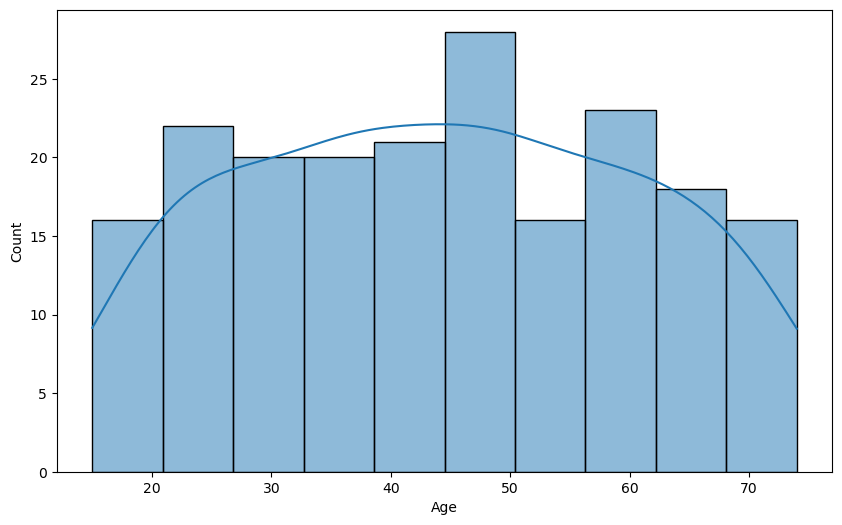

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=10)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
numerics=LabelEncoder()
df["Sex_n"]=numerics.fit_transform(df["Sex"])
df["BP_n"]=numerics.fit_transform(df["BP"])
df["Cholesterol_n"]=numerics.fit_transform(df["Cholesterol"])
print(df)

     Age Sex      BP Cholesterol  Na_to_K   Drug  Sex_n  BP_n  Cholesterol_n
0     23   F    HIGH        HIGH   25.355  DrugY      0     0              0
1     47   M     LOW        HIGH   13.093  drugC      1     1              0
2     47   M     LOW        HIGH   10.114  drugC      1     1              0
3     28   F  NORMAL        HIGH    7.798  drugX      0     2              0
4     61   F     LOW        HIGH   18.043  DrugY      0     1              0
..   ...  ..     ...         ...      ...    ...    ...   ...            ...
195   56   F     LOW        HIGH   11.567  drugC      0     1              0
196   16   M     LOW        HIGH   12.006  drugC      1     1              0
197   52   M  NORMAL        HIGH    9.894  drugX      1     2              0
198   23   M  NORMAL      NORMAL   14.020  drugX      1     2              1
199   40   F     LOW      NORMAL   11.349  drugX      0     1              1

[200 rows x 9 columns]


In [12]:
df1=df.drop(["Cholesterol","BP","Sex"],axis="columns")
df1

,Age,Na_to_K,Drug,Sex_n,BP_n,Cholesterol_n
0,23,25.355,DrugY,0,0,0
1,47,13.093,drugC,1,1,0
2,47,10.114,drugC,1,1,0
3,28,7.798,drugX,0,2,0
4,61,18.043,DrugY,0,1,0
...,...,...,...,...,...,...
195,56,11.567,drugC,0,1,0
196,16,12.006,drugC,1,1,0
197,52,9.894,drugX,1,2,0
198,23,14.020,drugX,1,2,1


In [13]:
X = df1[['Age','Sex_n','BP_n','Cholesterol_n','Na_to_K']]
y = df1['Drug']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [18]:
y_pred_logreg = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_lr=accuracy_score(y_test,y_pred_logreg)
conf_lr=confusion_matrix(y_test,y_pred_logreg)
class_report=classification_report(y_test,y_pred_logreg,output_dict=True)

In [20]:
accuracy_lr

0.8833333333333333

In [21]:
conf_lr

array([[25,  0,  1,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 1,  0,  0,  1,  4],
       [ 0,  0,  1,  0, 17]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
precision_lr = precision_score(y_test, y_pred_logreg, average='macro')

In [26]:
recall_lr= recall_score(y_test, y_pred_logreg, average='macro')
f1_lr = f1_score(y_test, y_pred_logreg, average='macro')

In [27]:
recall_lr

0.8145299145299145

In [28]:
f1_lr

0.7738095238095238

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [31]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

In [32]:
accuracy_nb

0.9

In [34]:
precision_nb

0.825

In [35]:
recall_nb

0.9538461538461538

In [37]:
f1_nb

0.8653416149068324

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [49]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

In [54]:
accuracy_knn

0.6333333333333333

In [56]:
precision_knn

0.4545454545454545

In [58]:
recall_knn

0.4634920634920635

In [62]:
f1_knn

0.44305555555555554

In [64]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [66]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
accuracy_svm

0.7333333333333333

In [70]:
precision_svm

0.2982142857142857

In [72]:
recall_svm

0.4

In [74]:
f1_svm

0.3365925925925926

In [76]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('SVM', SVC())
]

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


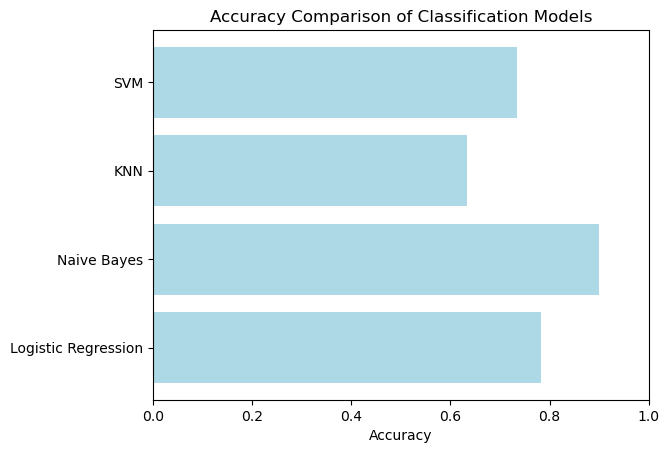

In [78]:
from sklearn.metrics import accuracy_score
accuracy_scores = {}

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
plt.barh(list(accuracy_scores.keys()), list(accuracy_scores.values()), color='lightblue')
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')
plt.xlim(0, 1)
plt.show()

In [92]:
model_accuracies = {
    'Logistic Regression': accuracy_lr,
    'K-Nearest Neighbors': accuracy_knn,
    'Support Vector Machine': accuracy_svm,
    'Naive Bayes': accuracy_nb
}

best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]
print("Model Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

print(f"\nBest Model: {best_model_name} with accuracy {best_accuracy:.4f}")

Model Accuracies:
Logistic Regression: 0.8833
K-Nearest Neighbors: 0.6333
Support Vector Machine: 0.7333
Naive Bayes: 0.9000

Best Model: Naive Bayes with accuracy 0.9000


In [102]:
import joblib
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

if best_model_name == 'Logistic Regression':
    best_model = logreg
elif best_model_name == 'K-Nearest Neighbors':
    best_model = knn
elif best_model_name == 'Support Vector Machine':
    best_model = svm
elif best_model_name == 'Naive Bayes':
    best_model = nb
joblib.dump(best_model, 'best_drug_prediction_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print(f"Best model ({best_model_name}) saved successfully!")


Best model (Naive Bayes) saved successfully!
